## 1.Importing the Necessary Libraries

In [5]:
import os
import math
import re
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import(
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.metrics import(
    r2_score,
    accuracy_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    recall_score
)

from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression,
    Lasso,
    Ridge,
    ElasticNet
)

from sklearn.tree import(
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC,SVR

## 2.Data Loading

In [6]:
path=os.path.join('Data_Sets','students_data.csv')
df=pd.read_csv(path)

In [7]:
df.head()

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,...,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
0,F,18.0,Urban,Greater_Than_3,Apart,higher_education,higher_education,at_home,teacher,course,...,very_good,medium,high,very_low,very_low,good,6.0,6,30.0,1.2
1,F,17.0,Urban,Greater_Than_3,Together,primary_education,primary_education,at_home,other,course,...,excellent,medium,medium,very_low,very_low,good,NaN,6,30.0,1.2
2,F,15.0,Urban,Less_Equal_3,Together,primary_education,primary_education,at_home,other,other,...,very_good,medium,low,low,medium,good,10.0,10,50.0,2.0
3,F,15.0,NaN,Greater_Than_3,Together,higher_education,lower_secondary,health,services,home,...,good,low,low,very_low,very_low,excellent,2.0,15,75.0,3.0
4,F,16.0,Urban,Greater_Than_3,Together,secondary_education,secondary_education,other,other,home,...,very_good,medium,low,very_low,low,excellent,NaN,10,50.0,2.0


#### Handling Missing Values

In [8]:
df.isnull().sum()

sex                          0
age                          3
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     3
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

In [9]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=((df[col].isnull().sum())/len(df))*100
        missing_info[col]=round(missing_count,2)
print("The columns with their Missing values are:") 

for col,perc in missing_info.items():
    print(f'{col}:{perc}%')

The columns with their Missing values are:
age:0.76%
address:0.51%
absences:0.76%


In [10]:
numerical_columns=df.select_dtypes(include=['number']).columns
df[numerical_columns].head()

,age,no_of_failures,absences,finalmarks,final_marks_in_percentage,finalgrades
0,18.0,0,6.0,6,30.0,1.2
1,17.0,0,NaN,6,30.0,1.2
2,15.0,3,10.0,10,50.0,2.0
3,15.0,0,2.0,15,75.0,3.0
4,16.0,0,NaN,10,50.0,2.0


### Box-plot for the Missing columns

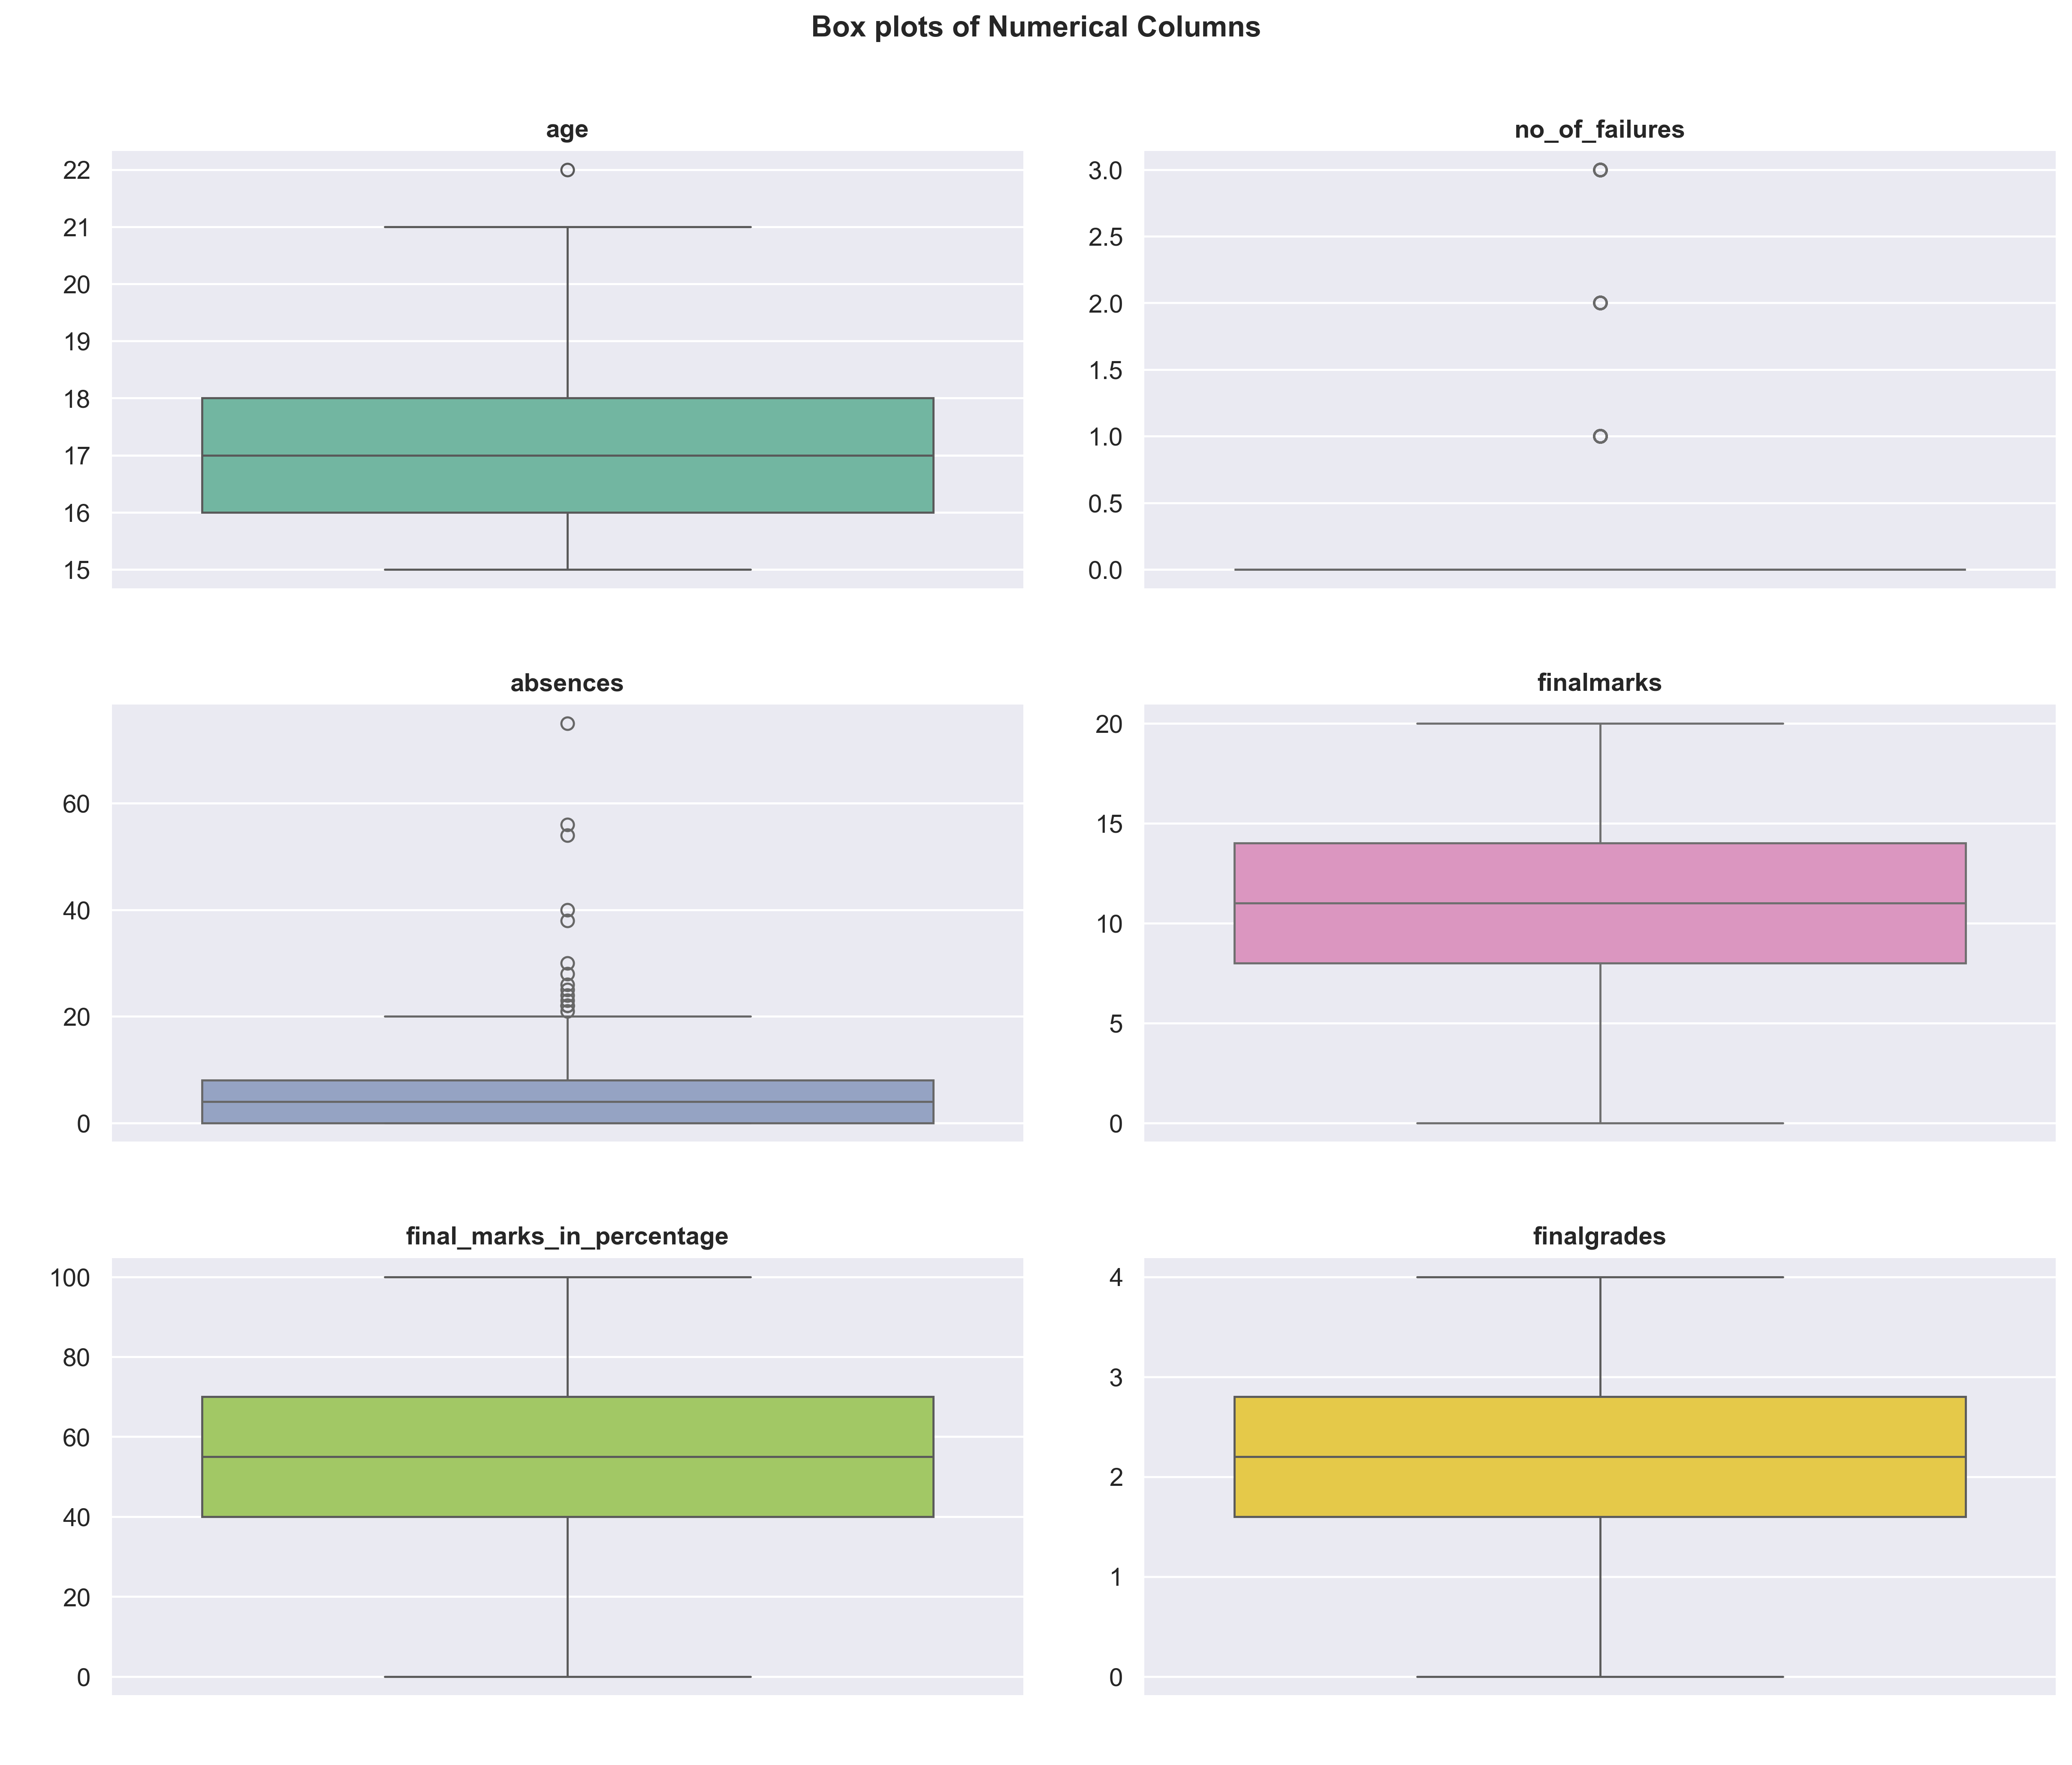

In [14]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig, axes=plt.subplots(nrows=3,ncols=2,figsize=(14,12),dpi=350)
axes=axes.flatten()
colors=sns.color_palette("Set2",n_colors=len(numerical_columns))

for idx,column in enumerate(numerical_columns):
    sns.boxplot(
        y=df[column],
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(column,fontsize=12,fontweight='bold')
    axes[idx].set_xlabel(" ")
    axes[idx].set_ylabel(" ")

for idx in range(len(numerical_columns),len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle(
    "Box plots of Numerical Columns",
    fontsize=14,
    fontweight='bold'
)  

plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

In [15]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

### Filling the categorical columns

In [16]:
categorical_columns=df.select_dtypes(exclude=['number']).columns

df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [17]:
df.isnull().sum()

sex                          0
age                          0
address                      0
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i